# Overview

Investigate famous instagrammers' following intersections.

In [1]:
%matplotlib inline

import glob
import instaloader
import json
import pandas as pd
import sys
from functools import reduce
from pathlib import Path

sys.path.append(str(Path.cwd().parent))
from instagram_network.user import get_profile
from instagram_network.followee_intersections import list_to_true_value_dict

In [2]:
files = glob.glob('../data/*_followees.json')
targets = [json.load(open(file)) for file in files]

## Famous Instagrammers' Profiles

In [3]:
famous_instagrammers = [get_profile(list(t)[0]) for t in targets]

In [4]:
instagrammer_df = pd.DataFrame(famous_instagrammers)
instagrammer_df.head()

,userid,username,full_name,is_verified,biography,followees,followers,mediacount
0,9229078,juxtapozmag,Juxtapoz Magazine,True,Art. Culture. 25 Years Strong. est 1994.,2506,1169579,9007
1,551082784,ratio3,Ratio 3,False,Ratio 3 is a contemporary art gallery in San F...,478,15653,503
2,293286474,galerieperrotin,Perrotin Gallery,True,Paris - Hong Kong - New York - Seoul - Tokyo -...,1949,366835,2087
3,5843166317,rosskramergallery,Ross+Kramer Gallery,False,Feb James/John Rivas “Double Trouble” NYC.,93,6248,165
4,215122360,nicolasparty,,True,,526,36282,245


In [5]:
instagrammer_df.to_csv('20191207_user_profiles.csv', index=False)

# Instersection Counts

In [6]:
all_followee_list = reduce(lambda x, y: {**x, **y}, targets, dict())

In [7]:
followee_df = pd.DataFrame({k: list_to_true_value_dict(v) for k, v in all_followee_list.items()}).fillna(False)

In [8]:
followee_df.sum(1).describe()

count    24693.000000
mean         1.286559
std          1.007109
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
dtype: float64

In [9]:
top50_users = followee_df.sum(1).nlargest(50, keep='all').rename('intersection_count')

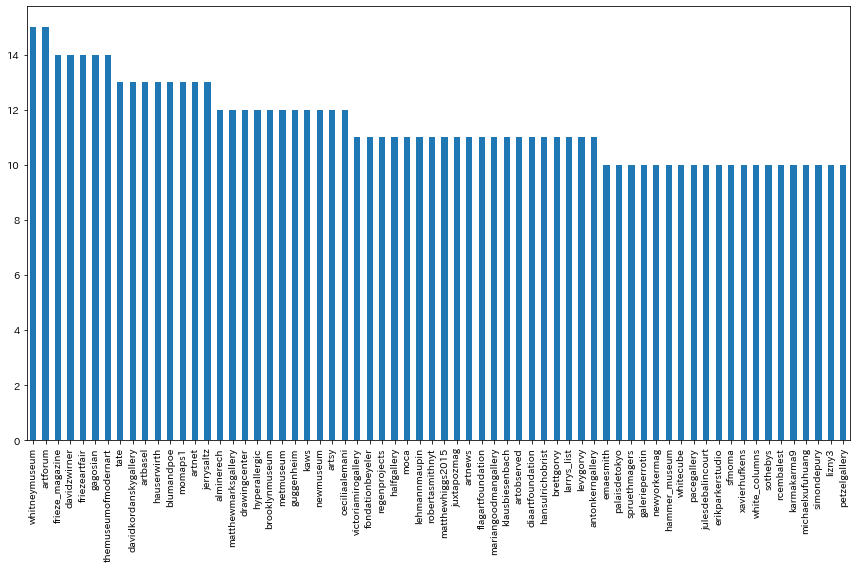

In [10]:
top50_users.plot.bar(figsize=(12, 8))

# Who are following users in the intersections

In [11]:
top50_followee_df = followee_df.loc[top50_users.index]

In [12]:
def concat_followers_name(s):
    """Get following user names as csv.
    Args:
        s (pd.Series): the values are True (following) or False (not following).

    """
    return ','.join(s[s].index)

In [13]:
followings = top50_followee_df.apply(concat_followers_name, axis=1).rename('following_users')

In [14]:
pd.concat([top50_users, followings], axis=1)

,intersection_count,following_users
whitneymuseum,15,"juxtapozmag,ratio3,galerieperrotin,rosskramerg..."
artforum,15,"juxtapozmag,ratio3,galerieperrotin,nicolaspart..."
frieze_magazine,14,"juxtapozmag,ratio3,galerieperrotin,nicolaspart..."
davidzwirner,14,"juxtapozmag,ratio3,galerieperrotin,nicolaspart..."
friezeartfair,14,"juxtapozmag,ratio3,galerieperrotin,nicolaspart..."
...,...,...
karmakarma9,10,"ratio3,nicolasparty,simondepury,takashipom,lis..."
michaelxufuhuang,10,"galerieperrotin,nicolasparty,simondepury,paceg..."
simondepury,10,"galerieperrotin,elmersfud,pacegallery,takaship..."
lizny3,10,"nicolasparty,elmersfud,simondepury,takashipom,..."


# Followed Users' Profiles

In [15]:
followed_users_profiles = [get_profile(username) for username in top50_users.index]

In [16]:
users_profiles = pd.DataFrame(followed_users_profiles).set_index('username')

In [17]:
users_info = pd.concat([top50_users, followings, users_profiles], axis=1)
users_info.head()

,intersection_count,following_users,userid,full_name,is_verified,biography,followees,followers,mediacount
username,,,,,,,,,
whitneymuseum,15,"juxtapozmag,ratio3,galerieperrotin,rosskramerg...",509323103,Whitney Museum of American Art,True,The Whitney houses one of the world's foremost...,270,1014639,2029
artforum,15,"juxtapozmag,ratio3,galerieperrotin,nicolaspart...",321268499,Artforum,True,Defining the world of contemporary art since 1962,2458,1124453,3814
frieze_magazine,14,"juxtapozmag,ratio3,galerieperrotin,nicolaspart...",469454735,frieze,True,frieze is the leading magazine of contemporary...,2261,542818,5752
davidzwirner,14,"juxtapozmag,ratio3,galerieperrotin,nicolaspart...",409186601,David Zwirner,True,#DavidZwirner is a contemporary art gallery wi...,1264,536213,2906
friezeartfair,14,"juxtapozmag,ratio3,galerieperrotin,nicolaspart...",365071579,Frieze,True,UPCOMING FAIRS:\nFrieze Los Angeles\nFebruary ...,2501,689906,2796


In [18]:
users_info.to_csv('20191208_intersections_with_users_info.csv')